In [59]:
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import os, os.path
import numpy as np

import cartopy.crs as ccrs
from glob import glob

%matplotlib inline

In [72]:
myproj = ccrs.PlateCarree()
myproj3 = ccrs.SouthPolarStereo()

In [60]:
casename = 'b.e21.BWCO2x4.f09_g17.CMIP6-abrupt4xCO2-WACCM.001'
datadir = '/glade/scratch/cmip6/archive/%s/lnd/hist' % casename

In [61]:
# CLM OUTPUT STREAMS (INFO COPIED FROM LND_IN)
"""
 hist_dov2xy = .true.,.false.,.false.,.true.,.false.
 hist_nhtfrq = 0,0,0,-8760,-8760
 hist_fexcl1 = 'PCT_GLC_MEC', 'SOIL1C_vr', 'SOIL1N_vr', 'SOIL2C_vr', 'SOIL2N_vr', 'SOIL3C_vr', 'SOIL3N_vr', 'CWDC_vr',
         'CWDN_vr', 'LITR1C_vr', 'LITR1N_vr', 'LITR2C_vr', 'LITR2N_vr', 'LITR3C_vr', 'LITR3N_vr', 'PCT_CFT',
         'PCT_NAT_PFT', 'SMIN_NO3_vr', 'CONC_O2_UNSAT', 'CONC_O2_SAT', 'SMIN_NH4_vr', 'SMINN_vr'
 hist_fincl1 = 'EFLX_LH_TOT_ICE', 'FIRE_ICE', 'FLDS_ICE', 'FSH_ICE', 'FSNO_ICE', 'FSR_ICE',
         'QFLX_SUB_SNOW_ICE', 'QRUNOFF_ICE', 'QSNOFRZ_ICE', 'QSNOMELT_ICE', 'RAIN_ICE', 'SNOW_ICE',
         'SNOWICE_ICE', 'SNOWLIQ_ICE', 'SNOTXMASS_ICE', 'TG_ICE', 'TOPO_COL_ICE', 'TSA_ICE',
         'TSOI_ICE', 'LEAFC_TO_LITTER', 'FROOTC_TO_LITTER', 'LITR1C_TO_SOIL1C', 'LITR1N_TO_SOIL1N', 'LITR2C_TO_SOIL1C',
         'LITR2N_TO_SOIL1N', 'LITR3C_TO_SOIL2C', 'LITR3N_TO_SOIL2N', 'DWT_WOOD_PRODUCTC_GAIN_PATCH'
 hist_fincl2 = 'GPP', 'NPP', 'AGNPP', 'TLAI', 'TOTVEGC', 'TSA', 'TREFMNAV', 'TREFMXAV', 'BTRANMN', 'NPP_NUPTAKE', 'GRAINC_TO_FOOD',
         'Vcmx25Z', 'FCTR', 'FCEV', 'FGEV', 'FSH', 'FIRE', 'FSR', 'FIRA', 'FSA', 'NFERTILIZATION', 'AR',
         'HR', 'VEGWP', 'HTOP', 'GSSUNLN', 'GSSHALN', 'TSKIN'
 hist_fincl3 = 'FSR', 'H2OSNO', 'Q2M', 'SNOWDP', 'TSA', 'TREFMNAV', 'TREFMXAV', 'TG', 'QRUNOFF',
         'FSH', 'FIRE', 'FIRA', 'FGR', 'EFLX_LH_TOT', 'RH2M', 'TLAI', 'GPP', 'NPP',
         'SOILWATER_10CM', 'TOTSOILLIQ', 'TOTSOILICE', 'AR', 'HR', 'DWT_CONV_CFLUX_PATCH', 'WOOD_HARVESTC', 'U10', 'DWT_WOOD_PRODUCTC_GAIN_PATCH',
         'GRAINC_TO_FOOD', 'SLASH_HARVESTC', 'TSOI_10CM', 'COL_FIRE_CLOSS', 'DWT_SLASH_CFLUX', 'QIRRIG', 'URBAN_HEAT', 'WASTEHEAT', 'HTOP',
         'TSKIN', 'FROOTC:I'
 hist_fincl4 = 'PCT_CFT', 'PCT_GLC_MEC', 'SOIL1C_vr', 'SOIL1N_vr', 'SOIL2C_vr', 'SOIL2N_vr', 'SOIL3C_vr', 'SOIL3N_vr',
         'CWDC_vr', 'CWDN_vr', 'LITR1C_vr', 'LITR1N_vr', 'LITR2C_vr', 'LITR2N_vr', 'LITR3C_vr', 'LITR3N_vr',
         'QICE_FORC', 'TSRF_FORC', 'TOPO_FORC', 'PCT_NAT_PFT', 'PCT_LANDUNIT', 'TOTLITC:I', 'TOT_WOODPRODC:I', 'CROPPROD1C:I',
         'TOTSOMC:I', 'TOTVEGC:I', 'FSNO_ICE'
 hist_fincl5 = 'TOTSOMC:I', 'TOTSOMC_1m:I', 'TOTECOSYSC:I', 'TOTVEGC:I', 'WOODC:I', 'TOTLITC:I', 'LIVECROOTC:I',
         'DEADCROOTC:I', 'FROOTC:I'
"""
True

True

In [62]:
files = sorted(glob(datadir+'/*h0*.nc'))

In [63]:
len(files) / 12

23.0

In [64]:
files[-1]

'/glade/scratch/cmip6/archive/b.e21.BWCO2x4.f09_g17.CMIP6-abrupt4xCO2-WACCM.001/lnd/hist/b.e21.BWCO2x4.f09_g17.CMIP6-abrupt4xCO2-WACCM.001.clm2.h0.0023-12.nc'

# opening the last available CLM *h0* output file

In [183]:
filename = files[-1]
ds=xr.open_dataset(filename, decode_times=False)

In [184]:
lats = ds['lat'][:]
lons = ds['lon'][:]
lon2d,lat2d = np.meshgrid(lons,lats)

In [185]:
da_h2osno_FINAL = ds['H2OSNO'] # snow cover in FINAL timestep (index -1)

In [196]:
parts = filename.split(casename)

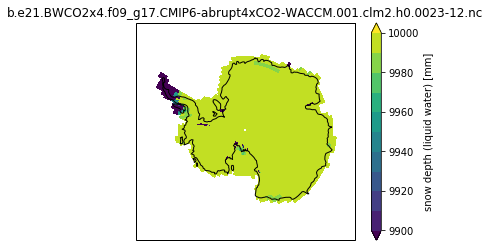

In [199]:
# MAKE PLOT OF FINAL SNOW COVER
levs = np.linspace(9900,1e4, 11)
fig, ax = plt.subplots(subplot_kw={'projection': myproj3})
da_h2osno_FINAL.plot(ax=ax,  transform=myproj, levels=levs);
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
ax.grid()
ax.set_title(casename + parts[-1])
ax.coastlines();

fig.savefig('H2OSNO_final.png', dpi=300)

# Surface dataset

In [70]:
fname_surfdat = '/glade/p/cesmdata/cseg/inputdata/lnd/clm2/surfdata_map/surfdata_0.9x1.25_78pfts_CMIP6_simyr1850_c170824.nc'
ds_surfdat = xr.open_dataset(fname_surfdat)

In [71]:
#ds_surfdat.info() 

In [73]:
varname = 'PCT_GLC_MEC_ICESHEET'
da_icesheet = ds_surfdat[varname].sum(dim='nglcec') / 100.
da_icesheet.load()

varname = 'PCT_WETLAND'
da_wetland = ds_surfdat[varname] / 100.
da_wetland.load()

varname = 'LANDFRAC_PFT'
da_landfrac = ds_surfdat[varname]
da_landfrac.load()

<xarray.DataArray 'LANDFRAC_PFT' (lsmlat: 192, lsmlon: 288)>
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Dimensions without coordinates: lsmlat, lsmlon
Attributes:
    long_name:  land fraction from pft dataset
    units:      unitless

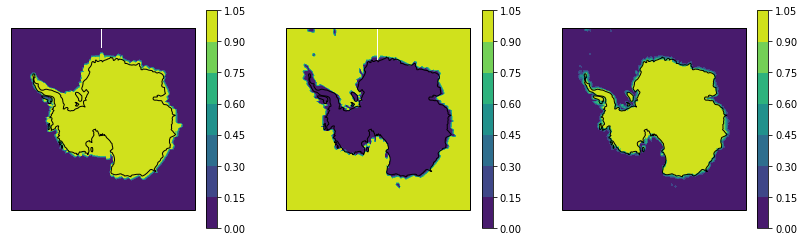

In [74]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(14,4), subplot_kw={'projection': myproj3})

variables = (da_icesheet, da_wetland, da_landfrac)
for ax,var in zip(axes, variables):

    cf = ax.contourf(lons,lats,var, transform=myproj)
    #var.plot(ax=ax, transform=myproj)
    ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    ax.grid()
    ax.coastlines()
    plt.colorbar(cf, ax=ax)

Wetlands in the surface dataset are covering everything else, including ocean grid points! 

# AIS ice shelves mask

INFO: min 0.000000, max 2.000000


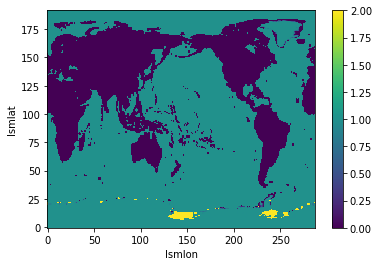

In [75]:
da_iceshelves = da_icesheet + da_wetland
#da_iceshelves
print("INFO: min %f, max %f" % (da_iceshelves.min(), da_iceshelves.max()))

#ax = plt.axes(projection=ccrs.PlateCarree())
da_iceshelves.plot()

The AIS ice shelves selected:

INFO: min 1.956248, max 2.000000


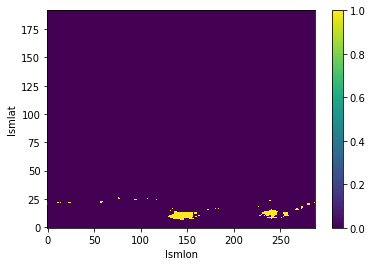

In [76]:
# da_iceshelves[lats.values>-60] = 0
da_iceshelves = da_iceshelves.where(da_iceshelves > 1.01)
print("INFO: min %f, max %f" % (da_iceshelves.min(), da_iceshelves.max()))
da_iceshelves = da_iceshelves.notnull()
#print("INFO: min %f, max %f" % (da_iceshelves.min(), da_iceshelves.max()))
da_iceshelves.plot()

In the polar projection

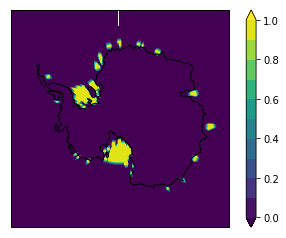

In [77]:
fig, ax = plt.subplots(subplot_kw={'projection': myproj3})

cf = ax.contourf(lons,lats,da_iceshelves, transform=myproj, levels=np.linspace(0,1,11), extend='both')
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
ax.grid()
ax.coastlines()
plt.colorbar(cf, ax=ax)

In [80]:
#print('INFO : area = %f km2' % np.sum(da_iceshelves * clm_area.values))

# CLM runtime PCT_LANDUNIT

In [81]:
ds_clmmask= xr.open_dataset('/gpfs/fs1/work/lvank/projects/AIS_shelves/clm_masks.nc', decode_times=False)
clm_area = ds_clmmask['area'].load()
clm_landfrac = ds_clmmask['landfrac'].load()

In [82]:
da_landunit = ds_clmmask['PCT_LANDUNIT'].squeeze().load()
da_landunit.shape, da_landunit.dims

((9, 192, 288), ('ltype', 'lat', 'lon'))

From the meta-data of the CLM file
```
                :ltype_vegetated_or_bare_soil = 1 ;
                :ltype_crop = 2 ;
                :ltype_UNUSED = 3 ;
                :ltype_landice_multiple_elevation_classes = 4 ;
                :ltype_deep_lake = 5 ;
                :ltype_wetland = 6 ;
                :ltype_urban_tbd = 7 ;
                :ltype_urban_hd = 8 ;
                :ltype_urban_md = 9 ;
```

In [83]:
clm_bare = da_landunit[0]
clm_glacier = da_landunit[3]
clm_wetland = da_landunit[5]

The percentages or fractions are unaware of the land fraction of the particular grid cell. In other words, the total of all the landunit types is 100 %, as shown in the following plot:

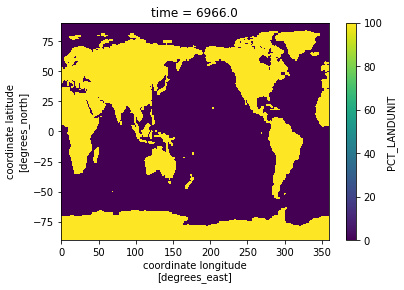

In [84]:
da_landunit.sum(dim='ltype').plot();

Here follow the fractions for bare, glacier and wetland:

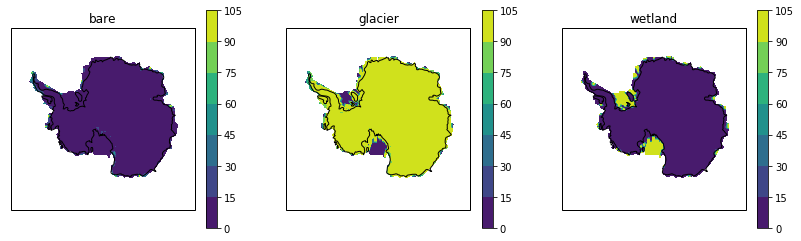

In [85]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(14,4), subplot_kw={'projection': myproj3})

variables = (clm_bare, clm_glacier, clm_wetland)
titles = ('bare', 'glacier', 'wetland')

for ax,var,title in zip(axes, variables, titles):
    cf = ax.contourf(lons,lats,var, transform=myproj)
    #var.plot(ax=ax, transform=myproj)
    ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    ax.grid()
    ax.set_title(title)
    ax.coastlines()
    plt.colorbar(cf, ax=ax)

Again, let's define the AIS ice shelves as the wetland fraction below 60 S: 

In [86]:
clm_iceshelves = clm_wetland.copy()
clm_iceshelves[lats.values > -60 ] = 0 
clm_iceshelves /= 100

In [87]:
#print('INFO : area = %f km2' % np.sum(clm_iceshelves * clm_area.values * clm_landfrac.values))
print('INFO : area = %f km2' % np.sum(clm_iceshelves * clm_area.values))

INFO : area = 892303.500000 km2


# Reading all monthly *h0* files directly from Python 
## not used, takes too long to load

In [130]:
fac = 86400 * 365 # mm/sec to mm/yr
fac2 = 1e-12 # mm/yr to Gt/yr
fac3 = 1.e6 # km^2 to m^2

In [89]:
# TAKES VERY LONG TO COMPLETE!!! 
#ds = xr.open_mfdataset(files[1:], concat_dim='time', decode_times=False)

# Yearly mean files (pre-processed)

In [138]:
#filename = '/glade/scratch/lvank/archive/avg2/b.e21.BWCO2x4.f09_g17.CMIP6-abrupt4xCO2-WACCM.001/1-23/H2OSNO_b.e21.BWCO2x4.f09_g17.CMIP6-abrupt4xCO2-WACCM.001_moncat.nc'
filename = '/glade/scratch/lvank/archive/avg2/b.e21.BWCO2x4.f09_g17.CMIP6-abrupt4xCO2-WACCM.001/1-23/b.e21.BWCO2x4.f09_g17.CMIP6-abrupt4xCO2-WACCM.001_yearmean.nc'
ds = xr.open_dataset(filename, decode_times=False)
da_h2osno = ds['H2OSNO'].load()

In [139]:
#filename = '/glade/scratch/lvank/archive/avg2/b.e21.BWCO2x4.f09_g17.CMIP6-abrupt4xCO2-WACCM.001/1-23/QSNOMELT_b.e21.BWCO2x4.f09_g17.CMIP6-abrupt4xCO2-WACCM.001_moncat.nc'
#ds = xr.open_dataset(filename, decode_times=False)
da_qsnomelt = ds['QSNOMELT'].copy().load()
da_qsnomelt *= fac
#da_qsnomelt *= fac
da_qsnomelt.max()

<xarray.DataArray 'QSNOMELT' ()>
array(3850.847168)

In [140]:
da_qsnomelt.shape

(23, 192, 288)

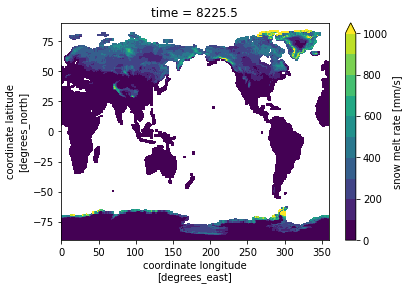

In [188]:
da_qsnomelt[-1].plot(levels=np.linspace(0,1000,11))

## Time series

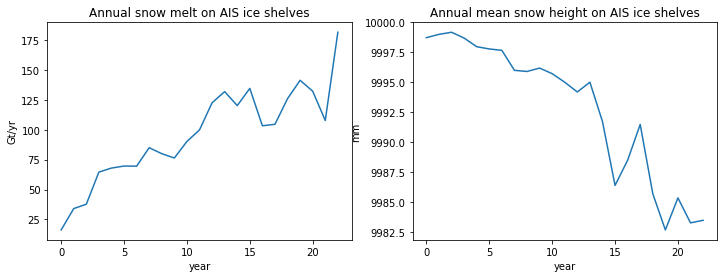

In [191]:
# Timeseries for snow melt
ts_snowmelt = np.sum(da_qsnomelt * clm_iceshelves.values * clm_landfrac.values * fac2 * clm_area * fac3, axis=(1,2))

# Timeseries for snow height
mm = clm_iceshelves.values * clm_landfrac.values * clm_area
ts_h2osno = np.sum(da_h2osno * mm, axis=(1,2)) / np.sum(mm)

fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,4))

ax = ax1
ax.plot(ts_snowmelt)
ax.set_title('Annual snow melt on AIS ice shelves')
ax.set_ylabel('Gt/yr')
ax.set_xlabel('year')

ax = ax2
ax.plot(ts_h2osno)
ax.set_title('Annual mean snow height on AIS ice shelves')
ax.set_ylabel('mm')
ax.set_xlabel('year')

fig.savefig('timeseries.png',dpi=300)

In [189]:
ts_snowmelt

<xarray.DataArray (time: 23)>
array([ 16.284668,  34.10985 ,  37.759743,  64.59414 ,  67.94769 ,  69.64357 ,
        69.53454 ,  84.954666,  79.9567  ,  76.36439 ,  90.195145,  99.85024 ,
       122.49551 , 131.79672 , 120.14989 , 134.48102 , 103.28427 , 104.519165,
       125.95632 , 141.26277 , 132.14601 , 107.683975, 181.41039 ],
      dtype=float32)
Coordinates:
  * time     (time) float32 195.5 560.5 925.5 1290.5 1655.5 2020.5 2385.5 ...